# Enhancing Risk Assessment in Auto Insurance through Advanced Data Analysis

## Project Overview

### Company Background
In this project, we assume the role of a data scienctist in Porto Seguro (PS), one of Brazil’s largest auto and homeowner insurance companies, tasked with using data science to refine its auto insurance models. This is a critical domain where accurate risk assessment directly impacts both the company's profitability and customer satisfaction.

### Business Challenge
PS faces a significant challenge: inaccuracies in claim predictions are financially imbalanced. This results in overcharging low-risk drivers and undercharging high-risk ones. Such discrepancies not only affects bottom line, but also threatens market competitiveness and customer relations.

### Project Goal
The primary objective of this project is to conduct an in-depth Exploratory Data Analysis (EDA) on the provided [auto insurance claims dataset](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data). This EDA is the first step towards building a more accurate predictive model that can distinguish between high-risk and low-risk drivers, enabling more tailored insurance pricing.

## Importance of EDA

- **Understanding Data Complexity**: With a complex and vast dataset, an exhaustive EDA is critical to uncover hidden patterns, anomalies, and relationships between various variables.
- **Addressing Data Imbalance**: The dataset represents less than 5% of positive class (claims initiated), presenting a significant challenge in predictive modeling. The EDA will help identify the most effective strategies to manage this imbalance.
- **Feature Engineering and Selection**: Through EDA, we aim to identify and engineer features that are most predictive of insurance claims, enhancing the potential accuracy of future models.
- **Risk Identification**: This analysis will also assist in pinpointing key risk factors associated with insurance claims, vital for risk mitigation and pricing model refinement.

## Project phasing

- **Initial Phase**: This EDA represents the first phase of what could be a larger project. Insights from this phase will inform the direction of future model development.
- **Stakeholder Engagement**: The findings from this EDA will be crucial for engaging stakeholders and securing support for subsequent phases of the project.

## Business Impact

- **Cost Optimization**: More accurate predictions will allow for optimized pricing, reducing costs for low-risk drivers while ensuring high-risk drivers are appropriately charged.
- **Competitive Advantage**: Enhanced predictive accuracy can provide a significant competitive edge, potentially increasing our market share.
- **Regulatory Compliance and Ethical Considerations**: A more accurate model aligns with regulatory standards and ethical considerations in insurance pricing, bolstering our company's reputation and trustworthiness.

---

*Note: The above scenario is hypothetical and designed to frame the EDA within a real-world business context, highlighting the importance of data analysis in strategic decision-making.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline 
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency


In [2]:
# dataset provided by Porto Seguro contains features, which had been anonymised. Values of -1 indicate that the feature was missing from the observation.
df = pd.read_csv('train.csv',na_values=-1) # 'target' var is only contained in train data
print('Number rows and columns:',df.shape)


Number rows and columns: (595212, 59)


In [3]:
df.head(3).T

0          1          2
id               7.000000   9.000000  13.000000
target           0.000000   0.000000   0.000000
ps_ind_01        2.000000   1.000000   5.000000
ps_ind_02_cat    2.000000   1.000000   4.000000
ps_ind_03        5.000000   7.000000   9.000000
ps_ind_04_cat    1.000000   0.000000   1.000000
ps_ind_05_cat    0.000000   0.000000   0.000000
ps_ind_06_bin    0.000000   0.000000   0.000000
ps_ind_07_bin    1.000000   0.000000   0.000000
ps_ind_08_bin    0.000000   1.000000   1.000000
ps_ind_09_bin    0.000000   0.000000   0.000000
ps_ind_10_bin    0.000000   0.000000   0.000000
ps_ind_11_bin    0.000000   0.000000   0.000000
ps_ind_12_bin    0.000000   0.000000   0.000000
ps_ind_13_bin    0.000000   0.000000   0.000000
ps_ind_14        0.000000   0.000000   0.000000
ps_ind_15       11.000000   3.000000  12.000000
ps_ind_16_bin    0.000000   0.000000   1.000000
ps_ind_17_bin    1.000000   0.000000   0.000000
ps_ind_18_bin    0.000000   1.000000   0.000000
ps_reg_01        0.700000   0.800000   0.000000
ps_reg_02        0.200000   0.400000   0.000000
ps_reg_03        0.718070   0.766078        NaN
ps_car_01_cat   10.000000  11.000000   7.000000
ps_car_02_cat    1.000000   1.000000   1.000000
ps_car_03_cat         NaN        NaN        NaN
ps_car_04_cat    0.000000   0.000000   0.000000
ps_car_05_cat    1.000000        NaN        NaN
ps_car_06_cat    4.000000  11.000000  14.000000
ps_car_07_cat    1.000000   1.000000   1.000000
ps_car_08_cat    0.000000   1.000000   1.000000
ps_car_09_cat    0.000000   2.000000   2.000000
ps_car_10_cat    1.000000   1.000000   1.000000
ps_car_11_cat   12.000000  19.000000  60.000000
ps_car_11        2.000000   3.000000   1.000000
ps_car_12        0.400000   0.316228   0.316228
ps_car_13        0.883679   0.618817   0.641586
ps_car_14        0.370810   0.388716   0.347275
ps_car_15        3.605551   2.449490   3.316625
ps_calc_01       0.600000   0.300000   0.500000
ps_calc_02       0.500000   0.100000   0.700000
ps_calc_03       0.200000   0.300000   0.100000
ps_calc_04       3.000000   2.000000   2.000000
ps_calc_05       1.000000   1.000000   2.000000
ps_calc_06      10.000000   9.000000   9.000000
ps_calc_07       1.000000   5.000000   1.000000
ps_calc_08      10.000000   8.000000   8.000000
ps_calc_09       1.000000   1.000000   2.000000
ps_calc_10       5.000000   7.000000   7.000000
ps_calc_11       9.000000   3.000000   4.000000
ps_calc_12       1.000000   1.000000   2.000000
ps_calc_13       5.000000   1.000000   7.000000
ps_calc_14       8.000000   9.000000   7.000000
ps_calc_15_bin   0.000000   0.000000   0.000000
ps_calc_16_bin   1.000000   1.000000   1.000000
ps_calc_17_bin   1.000000   1.000000   1.000000
ps_calc_18_bin   0.000000   0.000000   0.000000
ps_calc_19_bin   0.000000   1.000000   1.000000
ps_calc_20_bin   1.000000   0.000000   0.000000

In [4]:
# Functions to categorise column names

def istype(name,_type):
    match = re.search('^.*'+_type+'.*$',name)
    if match:
        return True
    else:
        return False
    
def notBinOrCat(name):
    match = re.search('^.*bin.*$',name)
    if match:
        return False
    else:
        match = re.search('^.*cat.*$',name)
        if match:
            return False
        else:
            return True


ind_cols = [col for col in df.columns if istype(col,'ind')]
reg_cols = [col for col in df.columns if istype(col,'reg')]
car_cols = [col for col in df.columns if istype(col,'car')]
calc_cols= [col for col in df.columns if istype(col,'calc')]

ind_cat = [col for col in ind_cols if istype(col,'cat')]
reg_cat = [col for col in reg_cols if istype(col,'cat')]
car_cat = [col for col in car_cols if istype(col,'cat')]
calc_cat= [col for col in calc_cols if istype(col,'cat')]

ind_bin = [col for col in ind_cols if istype(col,'bin')]
reg_bin = [col for col in reg_cols if istype(col,'bin')]
car_bin = [col for col in car_cols if istype(col,'bin')]
calc_bin= [col for col in calc_cols if istype(col,'bin')]

ind_con = [col for col in ind_cols if not (istype(col,'bin') or istype(col,'cat'))]
reg_con = [col for col in reg_cols if not (istype(col,'bin') or istype(col,'cat'))]
car_con = [col for col in car_cols if not (istype(col,'bin') or istype(col,'cat'))]
calc_con= [col for col in calc_cols if not (istype(col,'bin') or istype(col,'cat'))]

### Exploratory Data Analysis

- Only Train dataset was used as it is the only dataset with 'Target' variable
- Preceding sections analyses dataset by data categories (discrete, continonous, categorical)

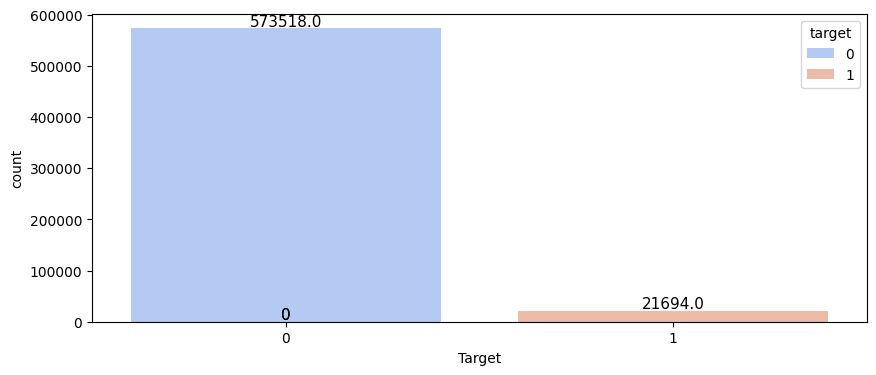

In [5]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='target', data=df, palette='coolwarm', hue='target')
plt.xlabel('Target')

value_counts = df['target'].value_counts()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show();


### Dataset has severe data imbalance!
- Very imbalanced dataset; <4% of 'Target' has value of 1

## Correlation Heatmap: First look Feature Interrelationships

Here we use a heatmap to get a first glace at the correlation dynamics between variables in our auto insurance dataset. 
For this analysis, we focus on the intrinsic correlations that may influence claim predictions, by dropping the 'id' column.

### Strategic Value

- **Guides Dimensionality Reduction**: Points out less informative features, supporting a more streamlined model
- **Spurs Feature Engineering**: Suggests possibilities for combining or transforming features based on their interrelationships
- **Facilitates Stakeholder Discussion**: Translates complex data relationships into a visual format accessible to all stakeholders

### Observations from this viz
- Heatmap suggests that **ps_calc_\*** variables have a correlation coffecient of 0, and would be good candidates to drop from modelling.

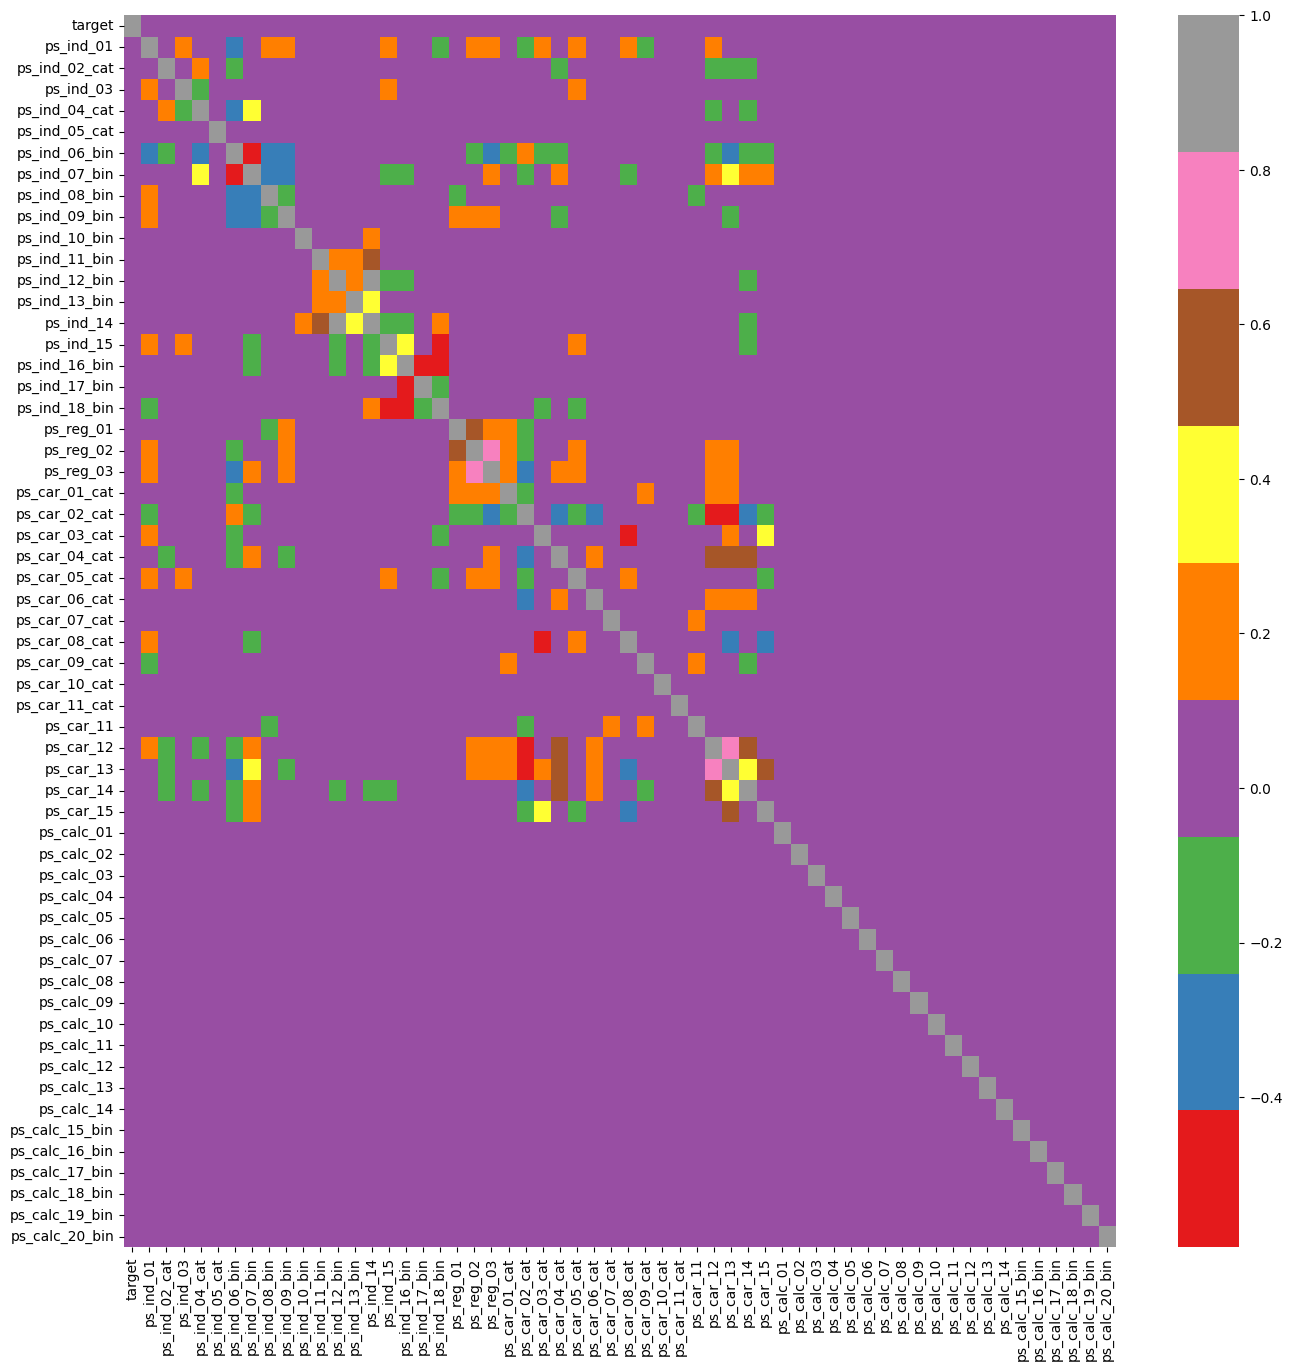

In [6]:
# high level analysis of correlation
cor = df.drop('id',axis=1).corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor,cmap='Set1')
plt.show();

## Visualising discrete variables

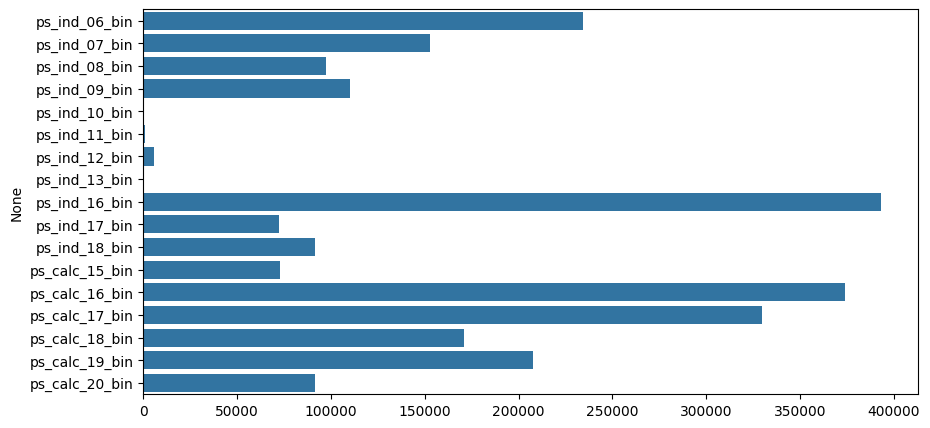

In [7]:
# Histogram showing how many times each binary property occurs with '1' in the dataset.
fig, ax = plt.subplots(figsize=(10,5))
ibh = df[ind_bin].sum()
cbh = df[calc_bin].sum()
bins = pd.concat([ibh, cbh], axis=0)
sns.barplot(x=bins.values, y=bins.index, orient='h', ax=ax)
plt.show();

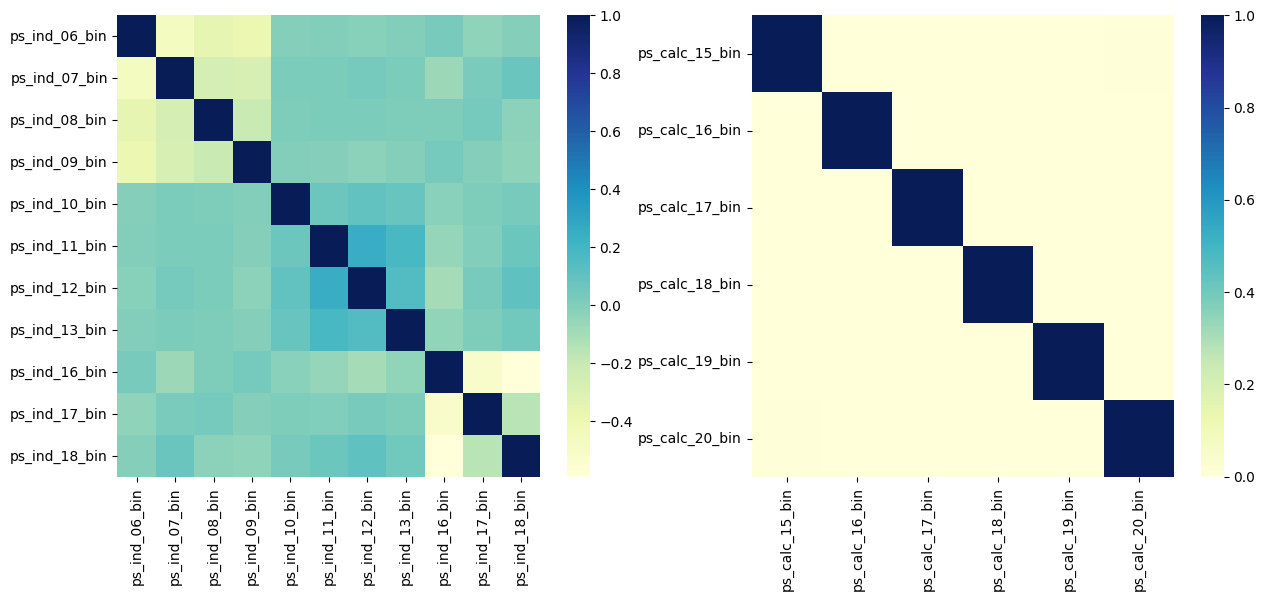

In [8]:
f,axarray = plt.subplots(1,2,figsize=(15,6))
plt.xticks(rotation='vertical')
sns.heatmap(df[ind_bin].corr(),ax=axarray[0],cmap="YlGnBu")
sns.heatmap(df[calc_bin].corr(),ax=axarray[1],cmap="YlGnBu")
plt.show();

## Visualising continous variables

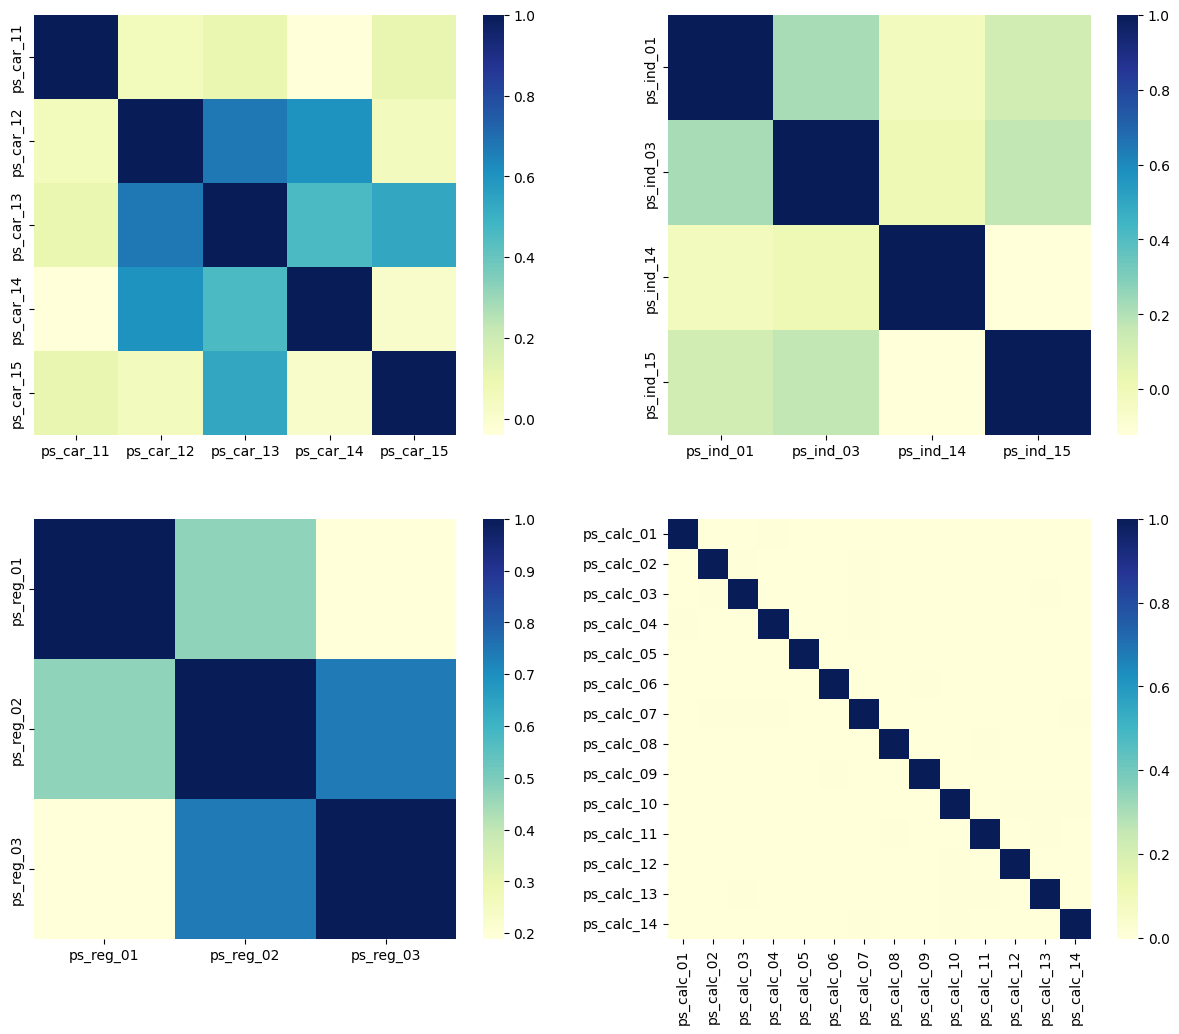

In [9]:
f,axarray = plt.subplots(2,2,figsize=(15,12))
plt.xticks(rotation='vertical')
sns.heatmap(df[car_con].corr(),ax=axarray[0][0],cmap="YlGnBu")
sns.heatmap(df[ind_con].corr(),ax=axarray[0][1],cmap="YlGnBu")
sns.heatmap(df[reg_con].corr(),ax=axarray[1][0],cmap="YlGnBu")
sns.heatmap(df[calc_con].corr(),ax=axarray[1][1],cmap="YlGnBu")
plt.show();

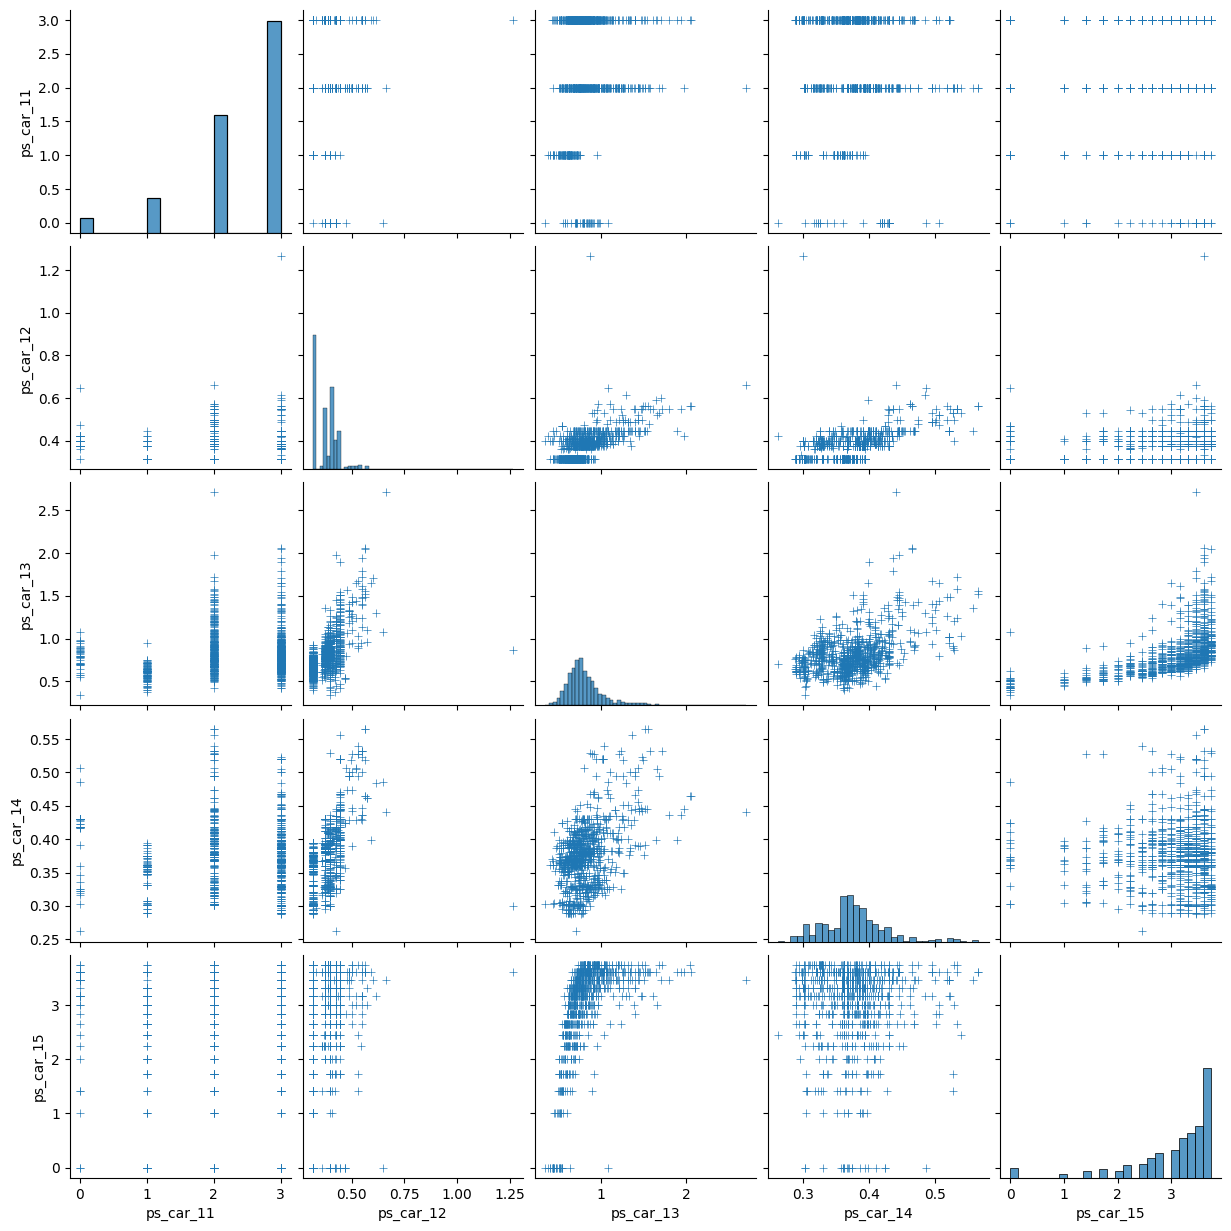

In [10]:
sns.pairplot(df[car_con][0:1000],markers="+");

## Visualizing Continuous Variables with Strategic Color Palettes

This exploratory data analysis employs a pairplot visualization, where we utilised a 'Paired' color palette to better understand the relationship between these variables and the `target`—the likelihood of claim.

### Visualization Strategy
The 'Paired' palette is strategically chosen for its dual advantage:
- **Visual Contrast**: It offers a stark delineation between classes, a necessity in our dataset where the positive class (`target` = 1) is underrepresented, accounting for less than 5% of the total observations
- **Aesthetic Clarity**: The palette is visually harmonious, facilitating extended analysis and clear presentation to stakeholders who may be less versed in data visualizations.

### Analytical Insights
The snippet below showcases a subset of our data, focusing on continuous variables within the vehicle category (`car_con`). The 'Paired' palette not only aids in the detection of patterns and anomalies but also in hypothesizing potential interactions between these variables that could influence the propensity to file a claim.

### Observations from this viz
- Minority class appears to be in localized clusters, as compared the data points for the majority class

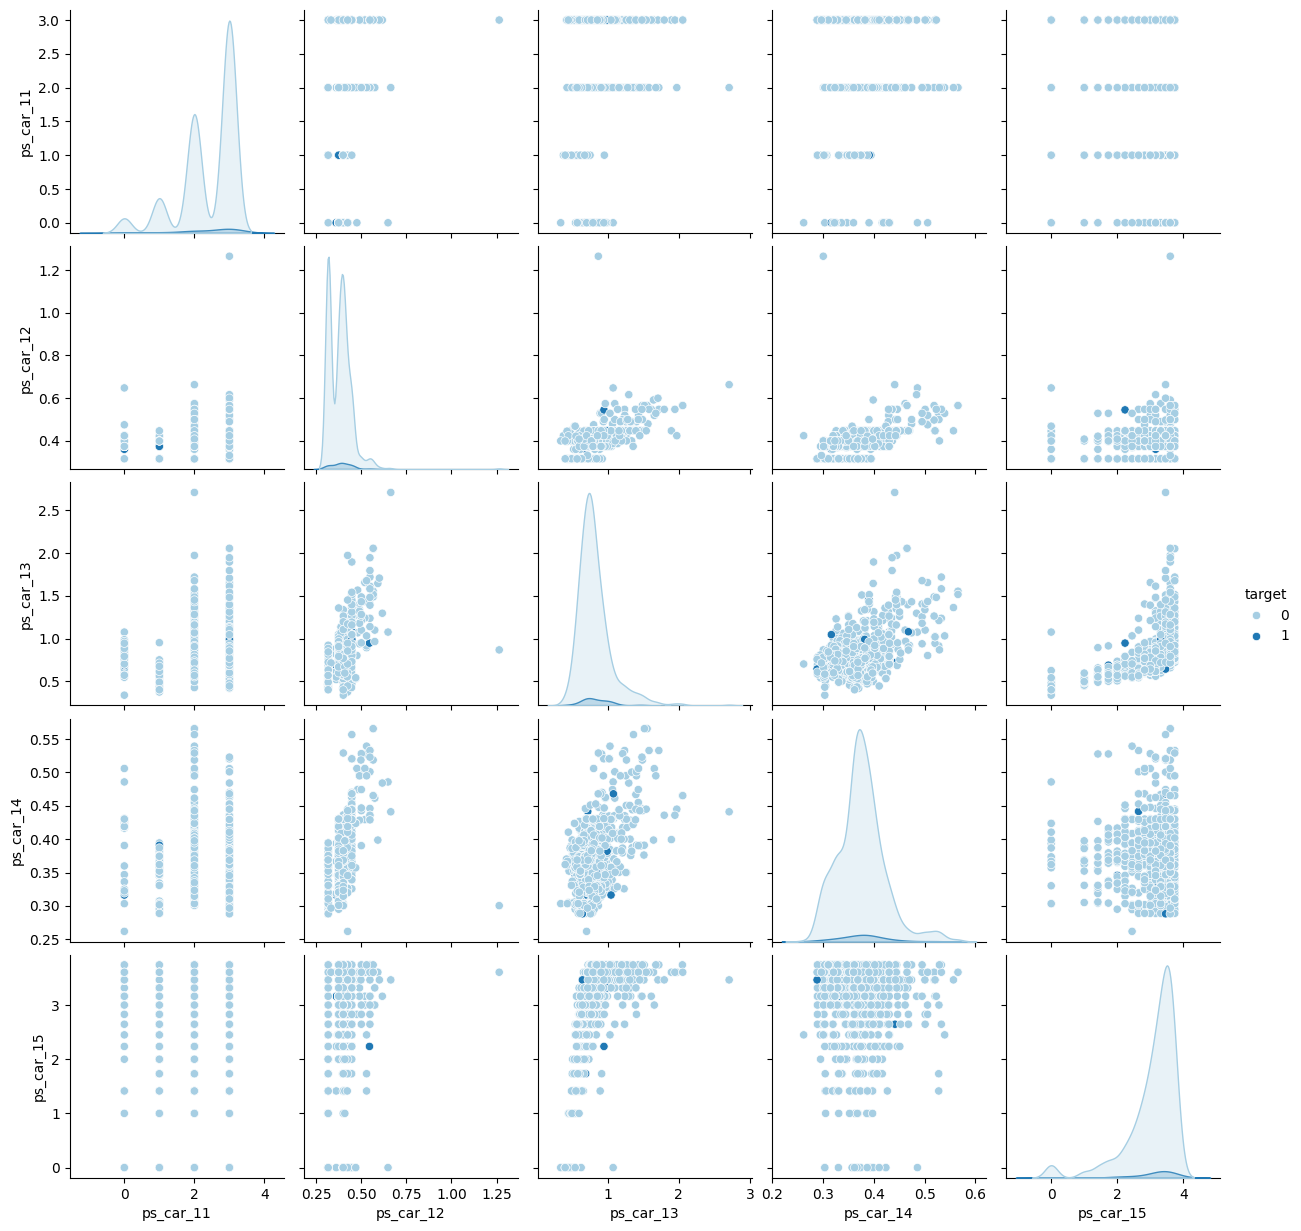

In [11]:
# Check on how 'target' is distributed amongst 'con' continous variables
tmp = pd.concat([df['target'],df[car_con]],axis=1)
sns.pairplot(tmp[0:1000],hue='target',palette="Paired");

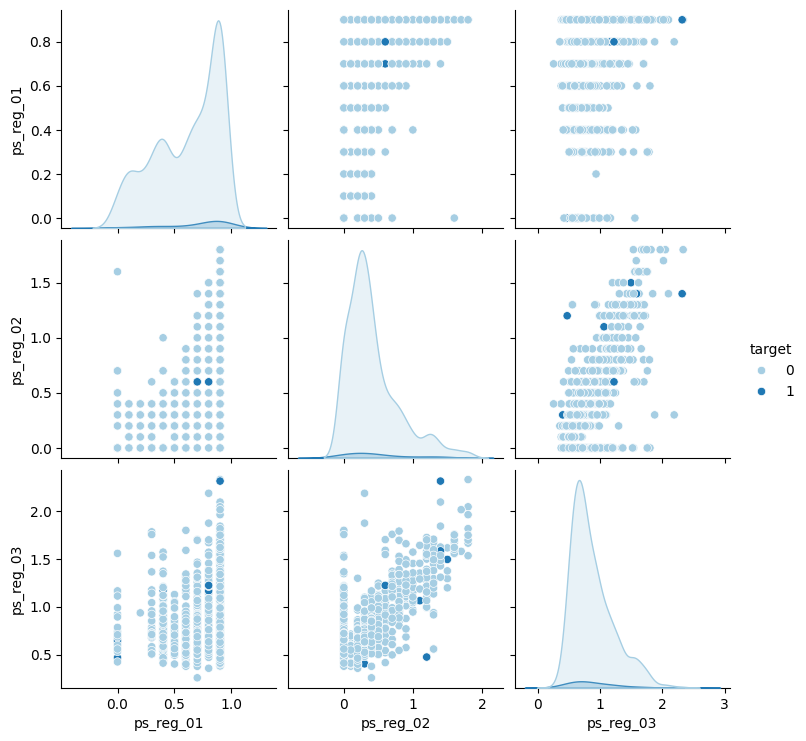

In [12]:
# Check on how 'target' is distributed amongst 'reg' continous variables
tmp = pd.concat([df['target'],df[reg_con]],axis=1)
sns.pairplot(tmp[0:1000],hue='target',palette="Paired");

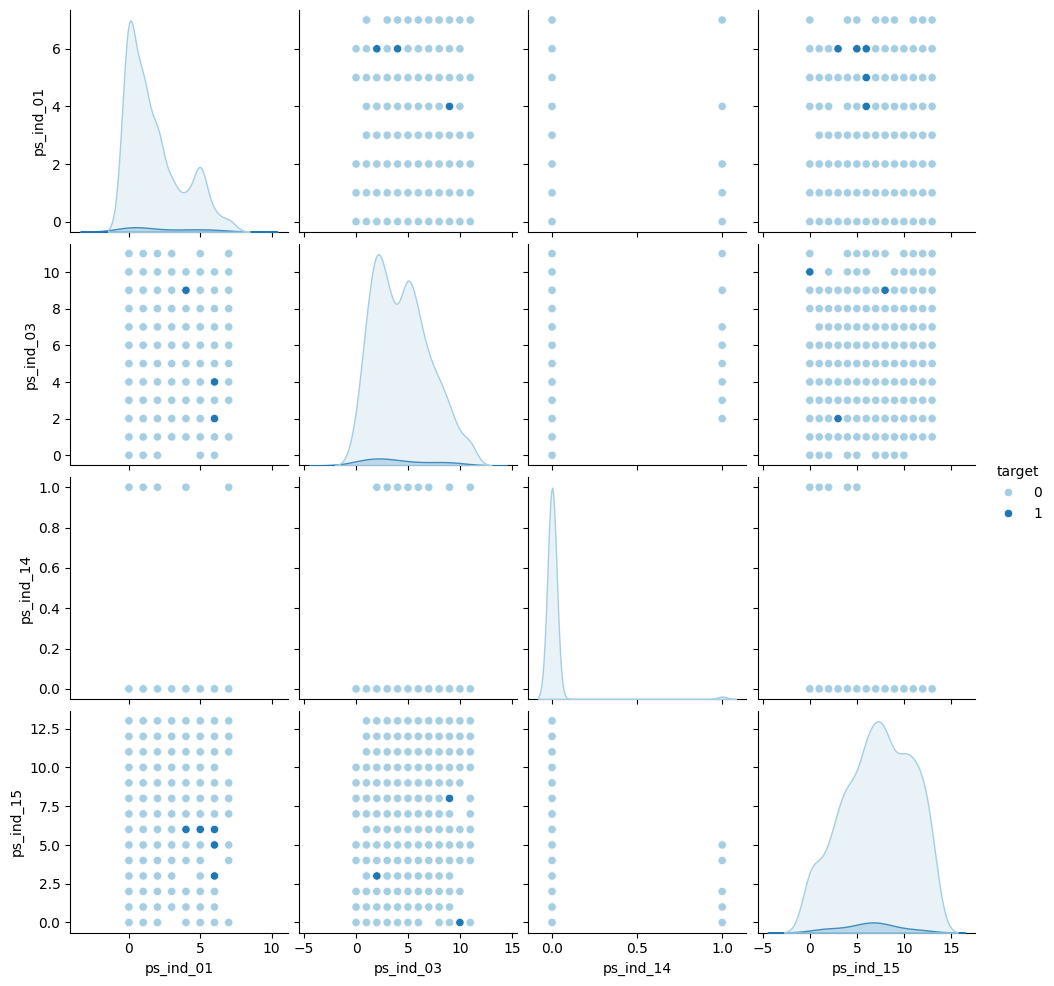

In [13]:
# Check on how 'target' is distributed amongst 'ind' continous variables
tmp = pd.concat([df['target'],df[ind_con]],axis=1)
sns.pairplot(tmp[0:1000],hue='target',palette="Paired");

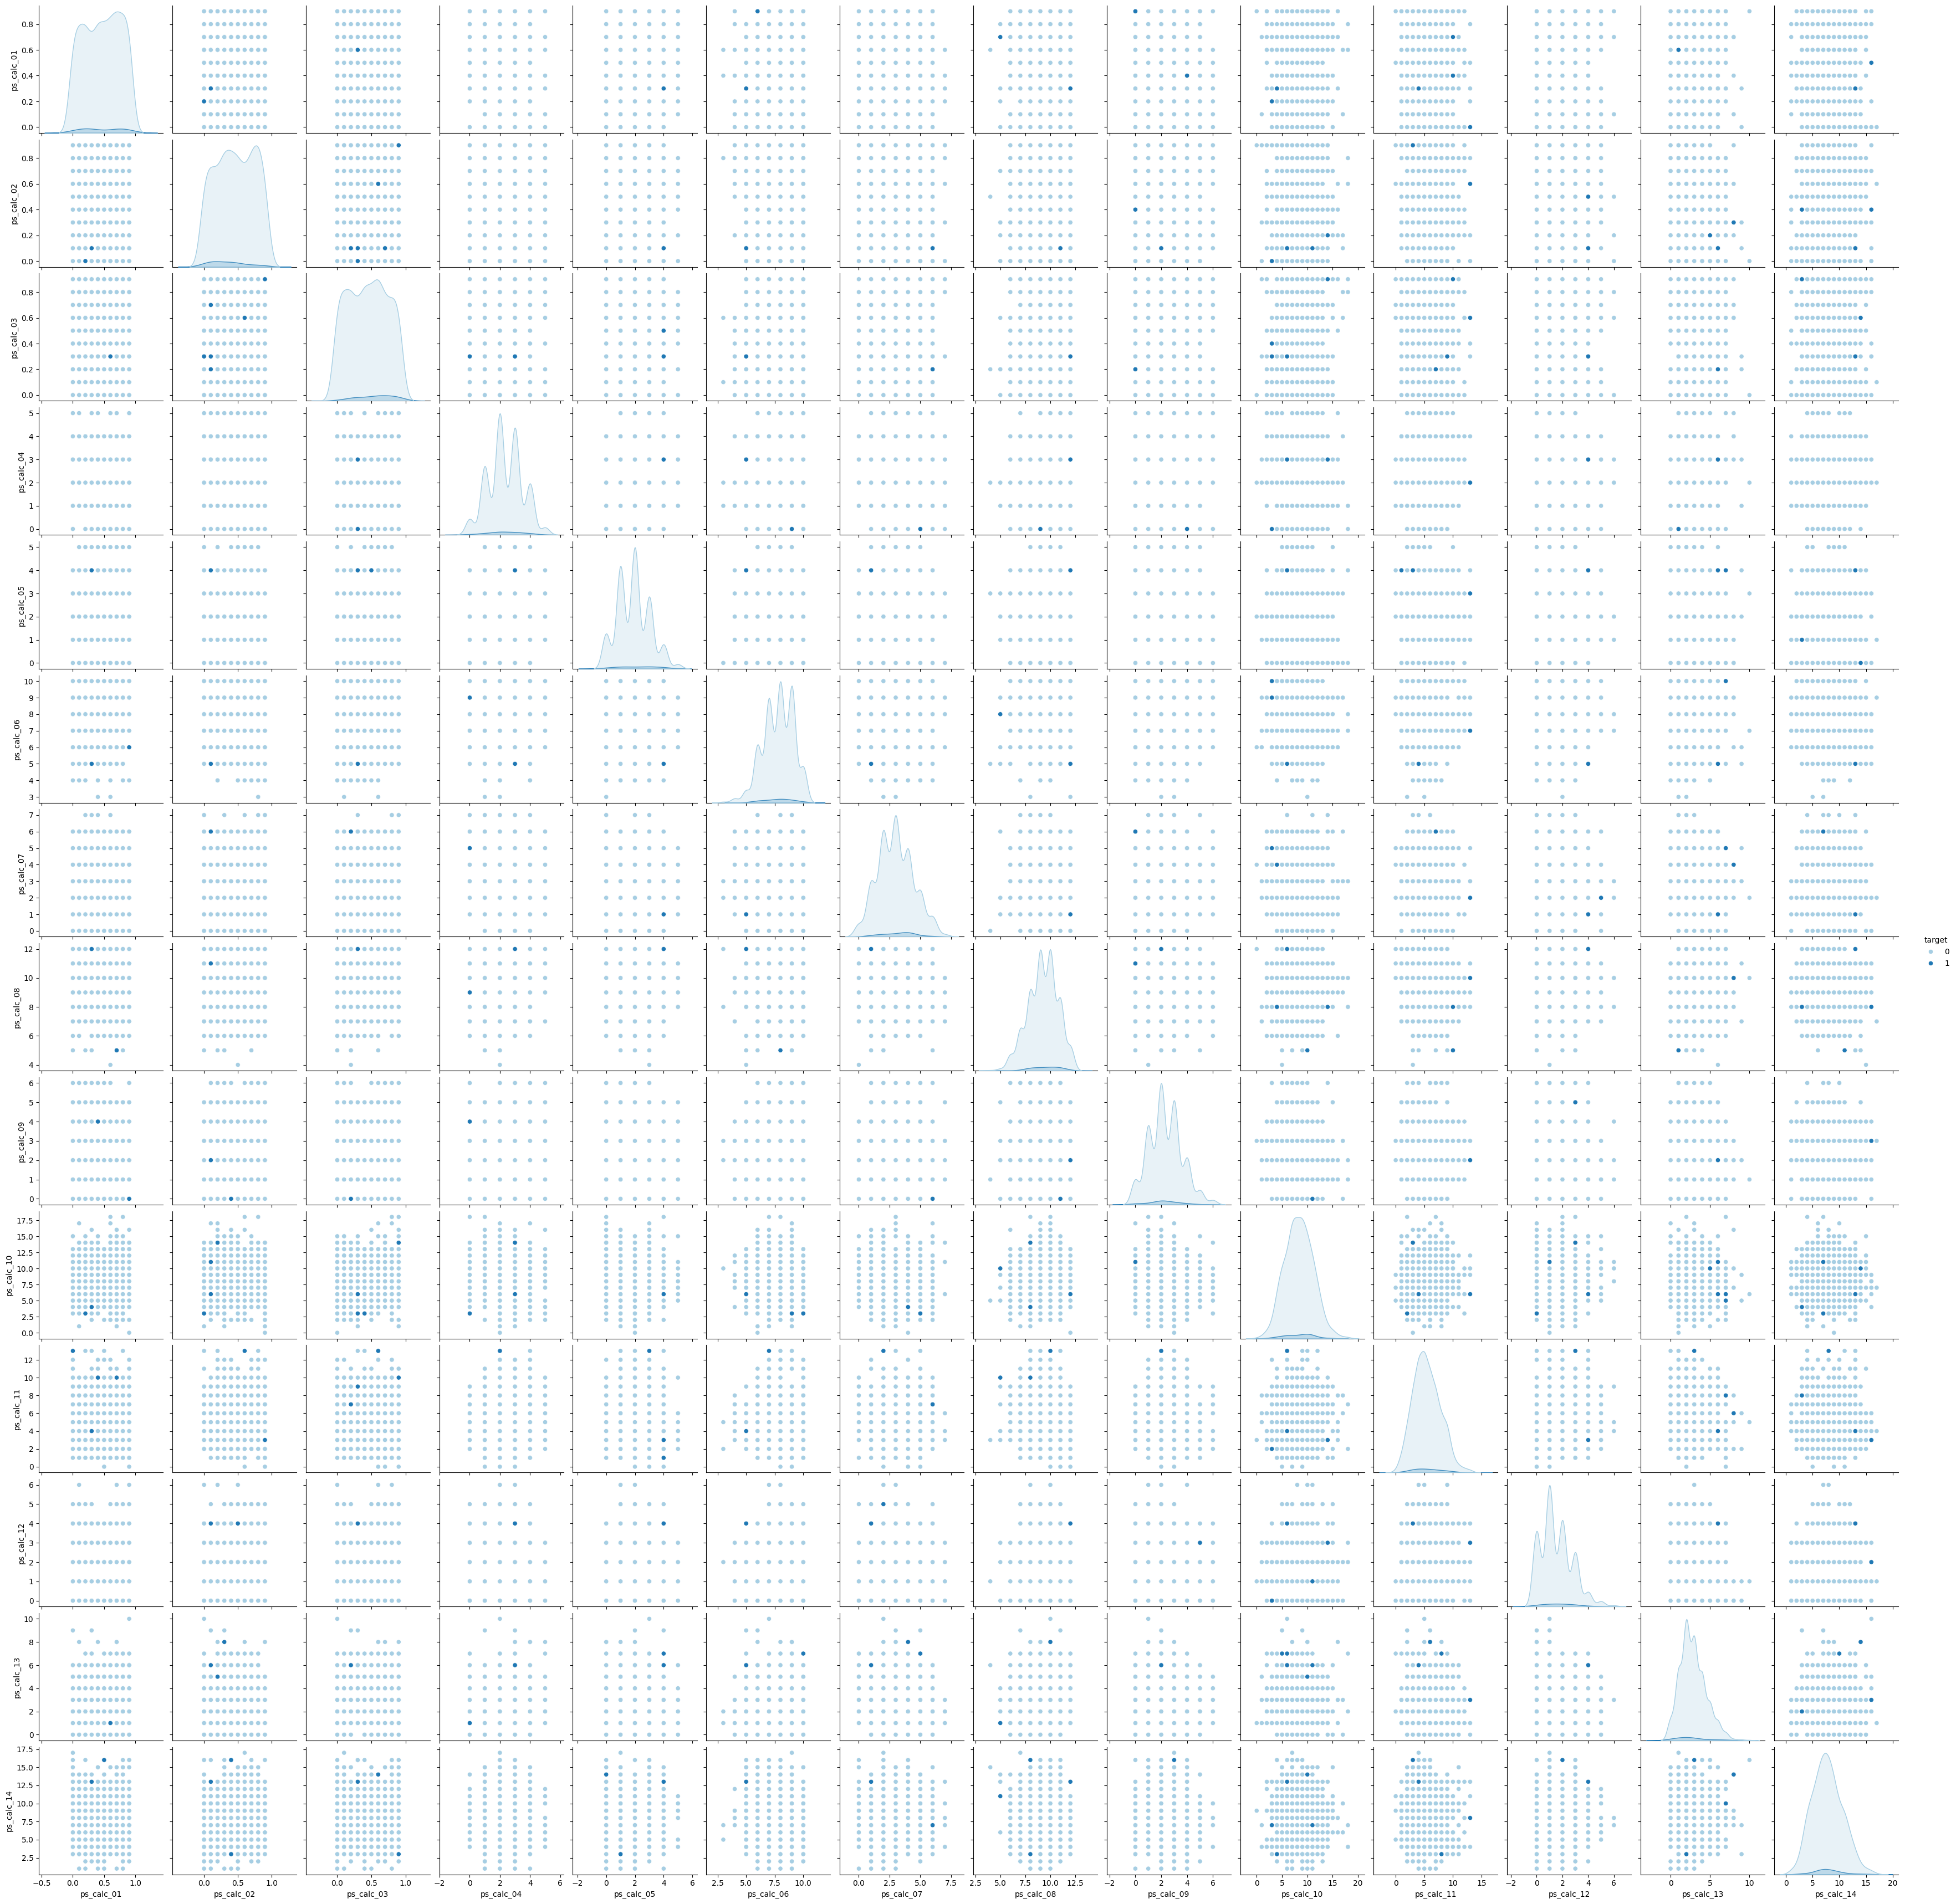

In [14]:
# Check on how 'target' is distributed amongst 'calc' continous variables
tmp = pd.concat([df['target'],df[calc_con]],axis=1)
sns.pairplot(tmp[0:1000],hue='target',palette="Paired");

## Looking at categorical variables

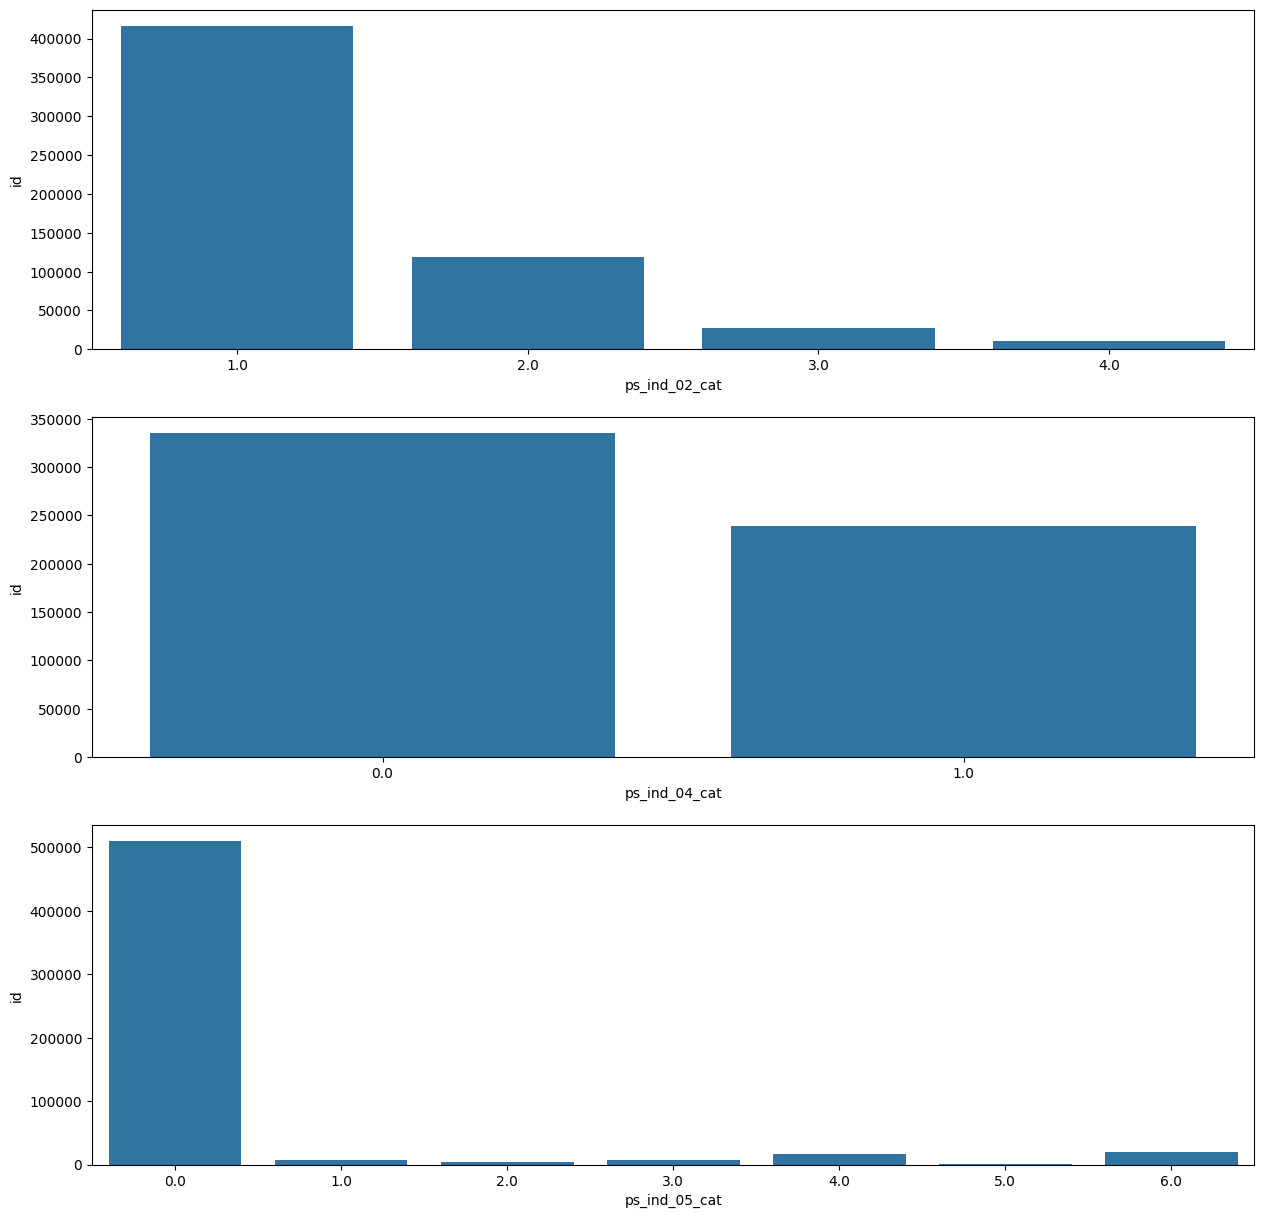

In [15]:
fig,axarray = plt.subplots(3,1,figsize=(15,15))
ind_cat_2_hist = df[df['target']==0].groupby(['ps_ind_02_cat'],as_index=False).count()
ind_cat_4_hist = df[df['target']==0].groupby(['ps_ind_04_cat'],as_index=False).count()
ind_cat_5_hist = df[df['target']==0].groupby(['ps_ind_05_cat'],as_index=False).count()
sns.barplot(x=ind_cat_2_hist['ps_ind_02_cat'],y=ind_cat_2_hist['id'],ax=axarray[0]);
sns.barplot(x=ind_cat_4_hist['ps_ind_04_cat'],y=ind_cat_4_hist['id'],ax=axarray[1]);
sns.barplot(x=ind_cat_5_hist['ps_ind_05_cat'],y=ind_cat_5_hist['id'],ax=axarray[2]);

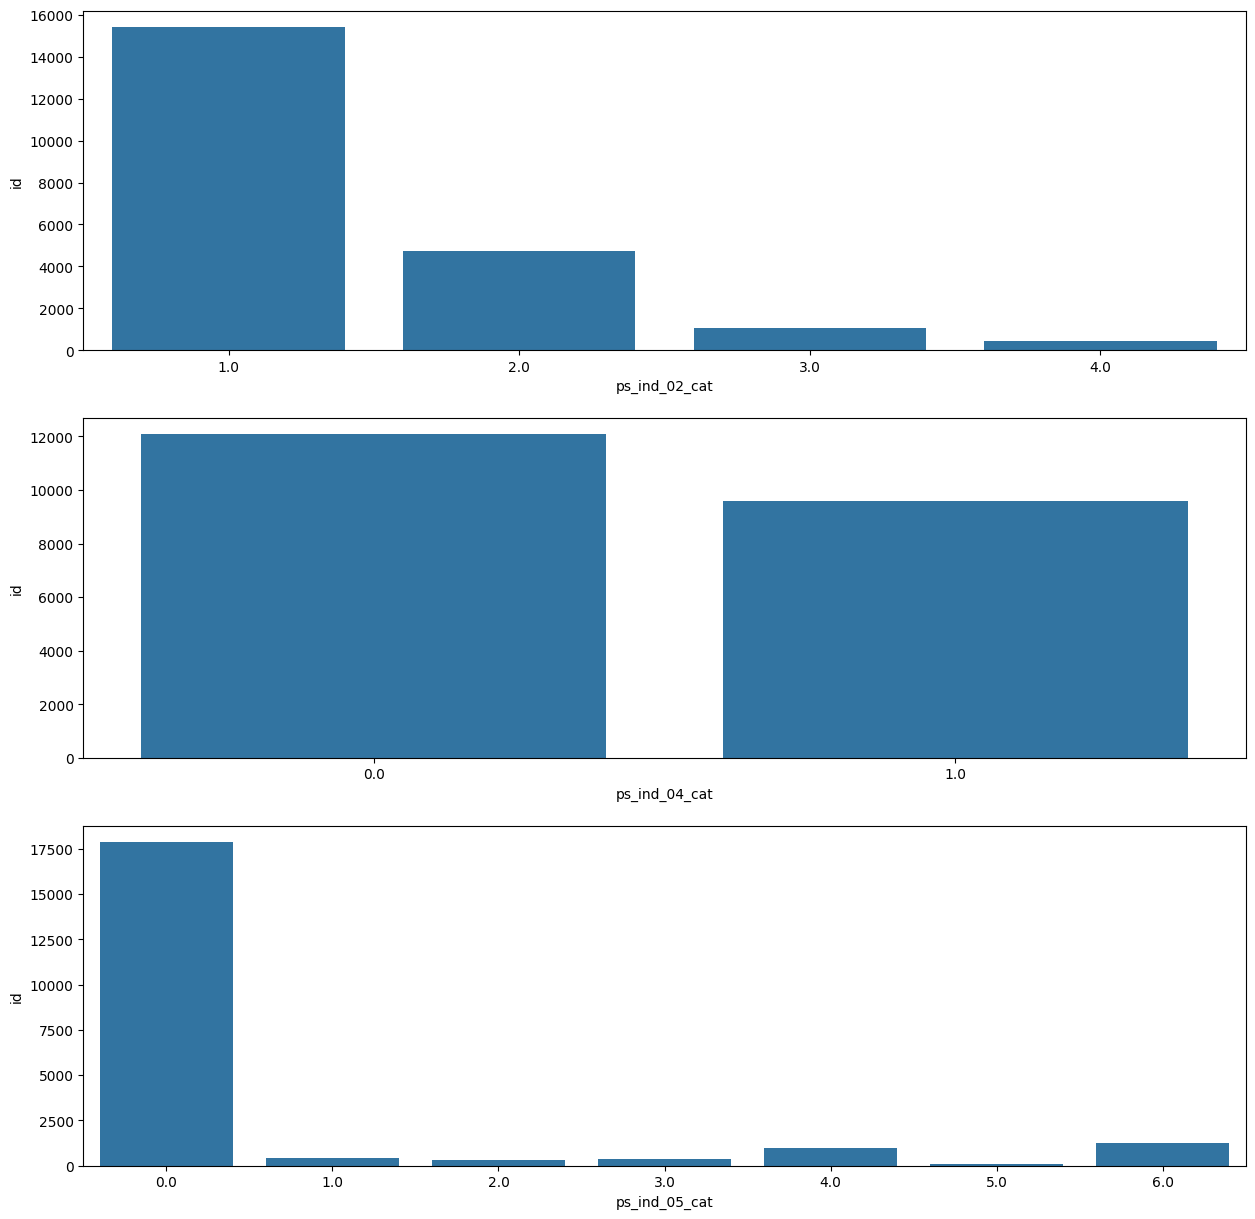

In [16]:
fig,axarray = plt.subplots(3,1,figsize=(15,15))
ind_cat_2_hist = df[df['target']==1].groupby(['ps_ind_02_cat'],as_index=False).count()
ind_cat_4_hist = df[df['target']==1].groupby(['ps_ind_04_cat'],as_index=False).count()
ind_cat_5_hist = df[df['target']==1].groupby(['ps_ind_05_cat'],as_index=False).count()
sns.barplot(x=ind_cat_2_hist['ps_ind_02_cat'],y=ind_cat_2_hist['id'],ax=axarray[0]);
sns.barplot(x=ind_cat_4_hist['ps_ind_04_cat'],y=ind_cat_4_hist['id'],ax=axarray[1]);
sns.barplot(x=ind_cat_5_hist['ps_ind_05_cat'],y=ind_cat_5_hist['id'],ax=axarray[2]);

# plots suggest that distribution of minority and majority classes are similar for categorical variables

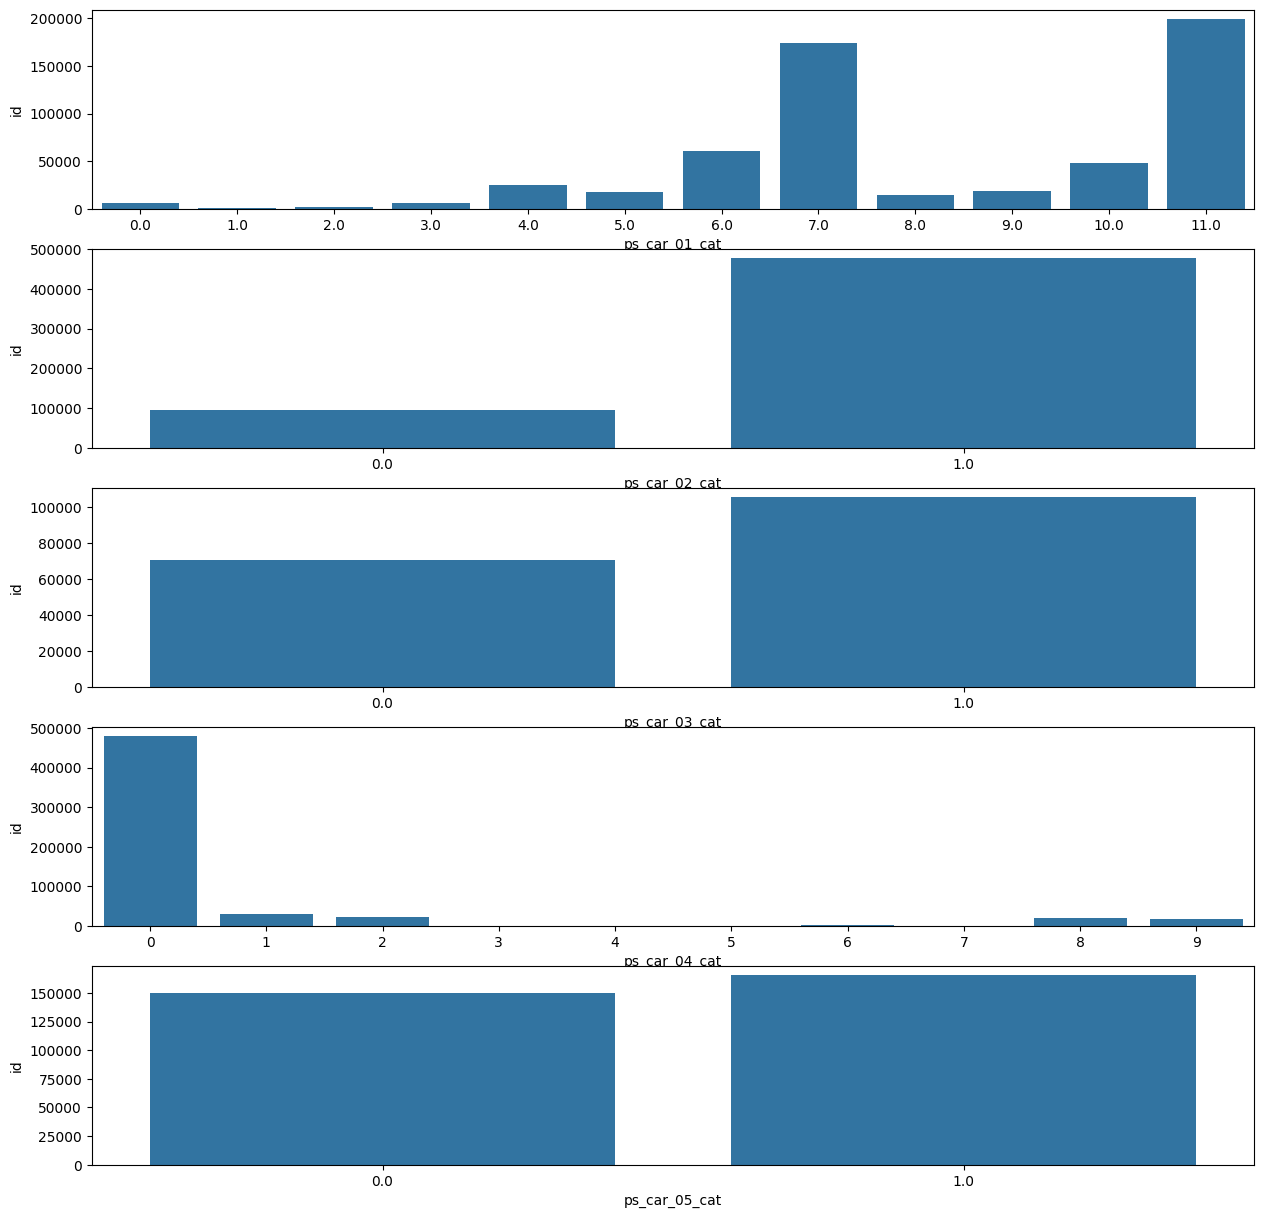

In [17]:
fig,axarray = plt.subplots(5,1,figsize=(15,15))
ind_car_1_hist = df[df['target']==0].groupby(['ps_car_01_cat'],as_index=False).count()
ind_car_2_hist = df[df['target']==0].groupby(['ps_car_02_cat'],as_index=False).count()
ind_car_3_hist = df[df['target']==0].groupby(['ps_car_03_cat'],as_index=False).count()
ind_car_4_hist = df[df['target']==0].groupby(['ps_car_04_cat'],as_index=False).count()
ind_car_5_hist = df[df['target']==0].groupby(['ps_car_05_cat'],as_index=False).count()
sns.barplot(x=ind_car_1_hist['ps_car_01_cat'],y=ind_car_1_hist['id'],ax=axarray[0]);
sns.barplot(x=ind_car_2_hist['ps_car_02_cat'],y=ind_car_2_hist['id'],ax=axarray[1]);
sns.barplot(x=ind_car_3_hist['ps_car_03_cat'],y=ind_car_3_hist['id'],ax=axarray[2]);
sns.barplot(x=ind_car_4_hist['ps_car_04_cat'],y=ind_car_4_hist['id'],ax=axarray[3]);
sns.barplot(x=ind_car_5_hist['ps_car_05_cat'],y=ind_car_5_hist['id'],ax=axarray[4]);

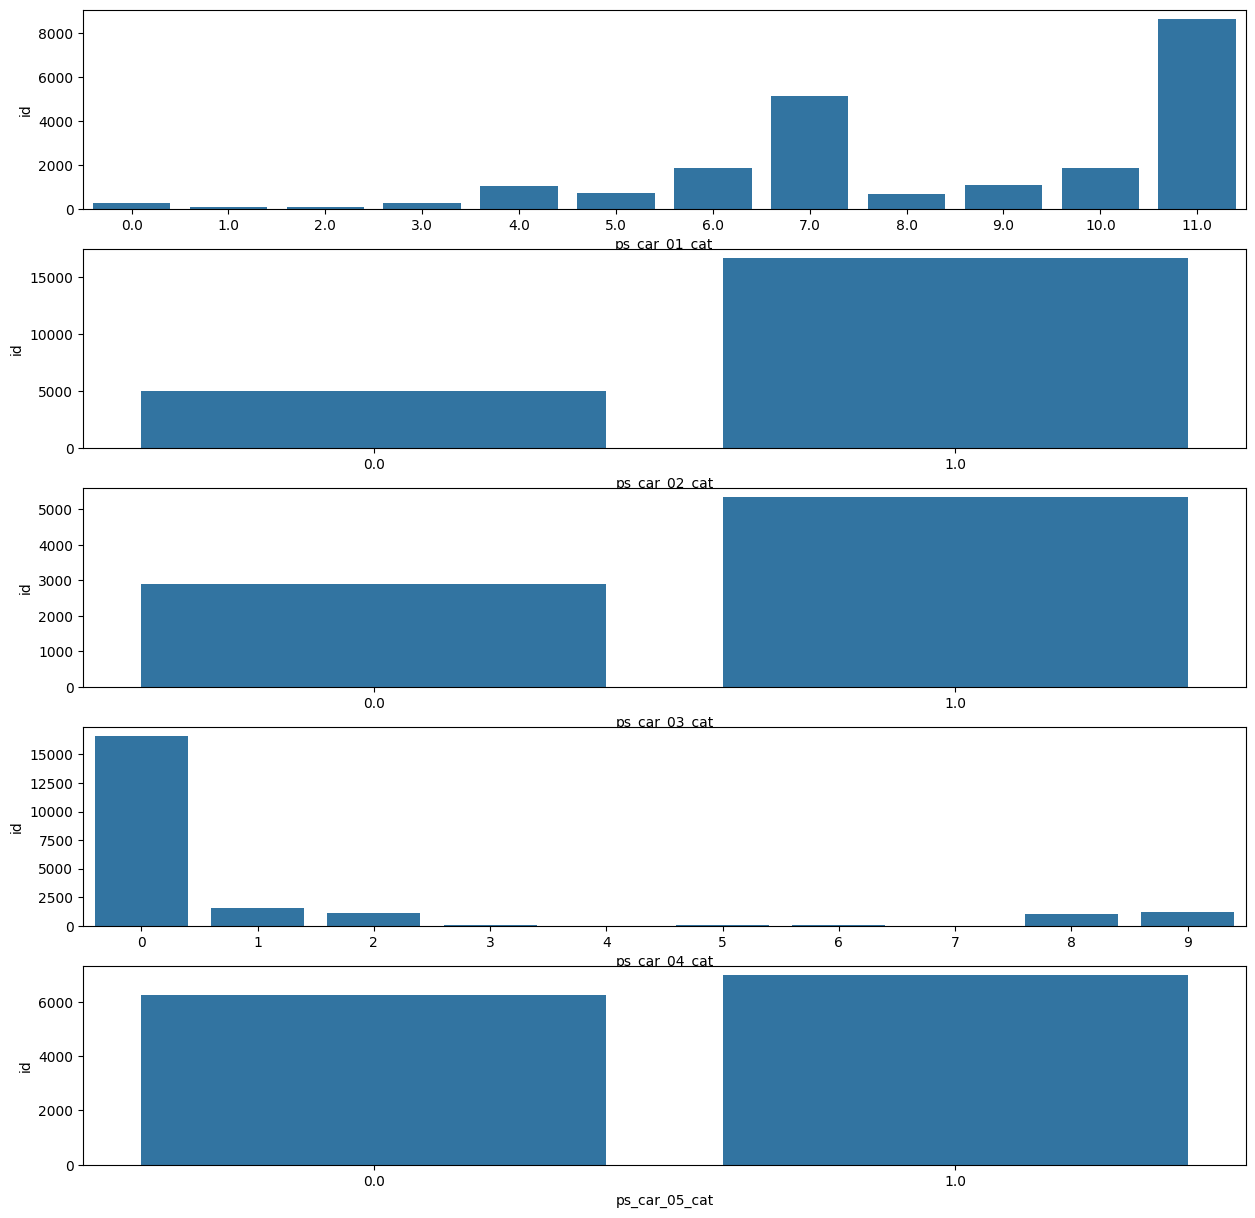

In [18]:
fig,axarray = plt.subplots(5,1,figsize=(15,15))
ind_car_1_hist = df[df['target']==1].groupby(['ps_car_01_cat'],as_index=False).count()
ind_car_2_hist = df[df['target']==1].groupby(['ps_car_02_cat'],as_index=False).count()
ind_car_3_hist = df[df['target']==1].groupby(['ps_car_03_cat'],as_index=False).count()
ind_car_4_hist = df[df['target']==1].groupby(['ps_car_04_cat'],as_index=False).count()
ind_car_5_hist = df[df['target']==1].groupby(['ps_car_05_cat'],as_index=False).count()
sns.barplot(x=ind_car_1_hist['ps_car_01_cat'],y=ind_car_1_hist['id'],ax=axarray[0]);
sns.barplot(x=ind_car_2_hist['ps_car_02_cat'],y=ind_car_2_hist['id'],ax=axarray[1]);
sns.barplot(x=ind_car_3_hist['ps_car_03_cat'],y=ind_car_3_hist['id'],ax=axarray[2]);
sns.barplot(x=ind_car_4_hist['ps_car_04_cat'],y=ind_car_4_hist['id'],ax=axarray[3]);
sns.barplot(x=ind_car_5_hist['ps_car_05_cat'],y=ind_car_5_hist['id'],ax=axarray[4]);

## Detailed analysis on correlations

In [19]:
upper_cor = cor.where( 
    np.triu(np.ones(cor.shape), k=1).astype(bool)) 

upper_cor.to_csv('corr_mat.csv')
# we proceed to examine in more detail variable-pairs with high correlation (>0.7); we have two pairs as per below

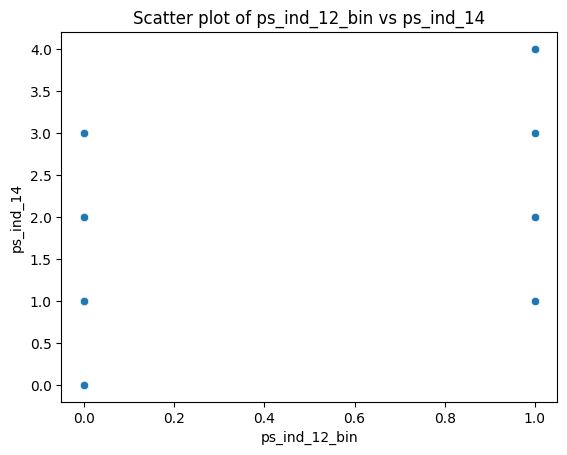

In [20]:
# exploring highest corr of 0.890127253
sns.scatterplot(data=df, x='ps_ind_12_bin', y='ps_ind_14')
plt.title('Scatter plot of ps_ind_12_bin vs ps_ind_14')
plt.show();

## Moving beyond Scatter to Violin Plot for Clearer Insights

Upon initial inspection with a scatter plot, the relationship between `ps_ind_12_bin` and `ps_ind_14` was not immediately clear
    - Thsi is due to the binary nature of `ps_ind_12_bin` 
Proceeded to use a violin plot as a way to gain deeper insight into the distribution of `ps_ind_14` within each category of `ps_ind_12_bin`

### Why a Violin Plot?

- **Richer Distribution View**: Unlike a scatter plot that only shows individual data points, a violin plot combines aspects of a box plot with a kernel density plot, offering potential insights on data distribution
- **Clarity in Skewness and Spread**: Plot provides visual cues about the skewness and spread of the data which are essential for understanding the underlying patterns within each category
- **Density Illustration**: The width of the violin indicates the density of data points at different values of `ps_ind_14`, giving immediate insight into where data is concentrated
- **Handling Overplotting**: It mitigates the overplotting issue in scatter plots, especially useful for binary categorical data where points can overlap, making it difficult to judge densities

### Observations from this viz
- Noticeable difference in the distribution of ps_ind_14 between the two groups of ps_ind_12_bin
- Less variability and fewer observations of ps_ind_14 when ps_ind_12_bin = 1
- Potential outliers are observed at higher values of ps_ind_14

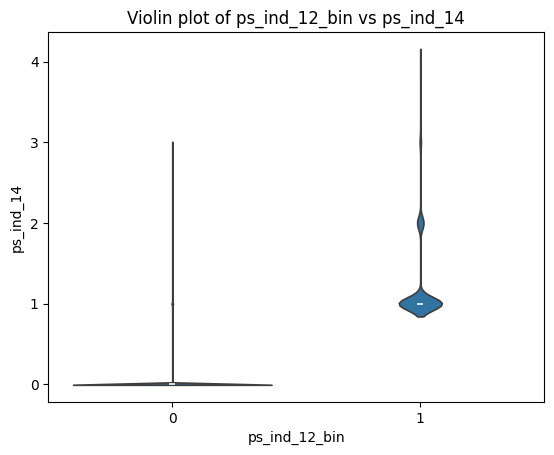

In [21]:
# code for violin plot
sns.violinplot(data=df, x='ps_ind_12_bin', y='ps_ind_14')
plt.title('Violin plot of ps_ind_12_bin vs ps_ind_14')
plt.show();

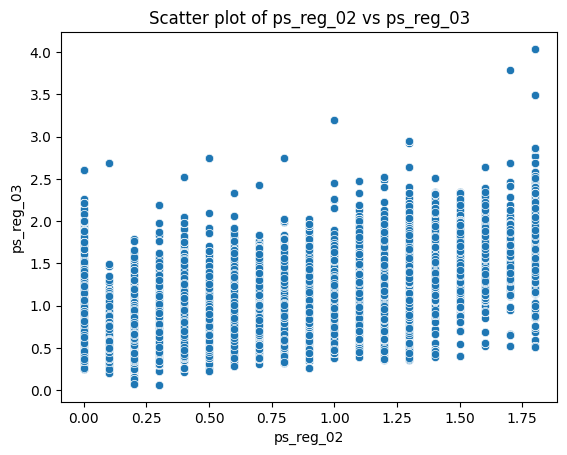

In [22]:
# exploring 2nd highest corr of 0.742668353
sns.scatterplot(data=df, x='ps_reg_02', y='ps_reg_03')
plt.title('Scatter plot of ps_reg_02 vs ps_reg_03')
plt.show();

### Analysis of "Violin plot of ps_reg_02 vs ps_reg_03"
- R/s between the variables appears to be non-linear in nature
- There appears to be some clustering around certain points of ps_reg_02
- Potential outliers are observed at higher values of ps_reg_03

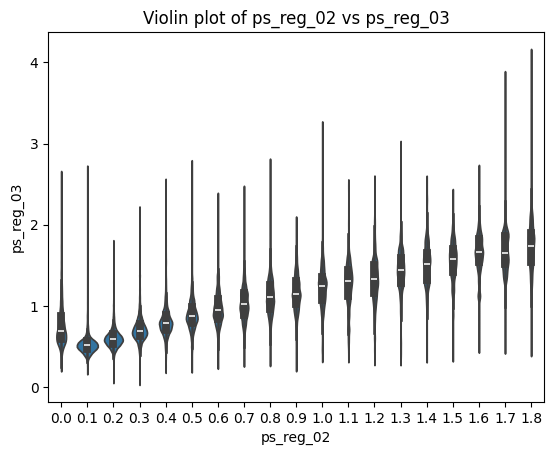

In [23]:
# Violin plot
sns.violinplot(data=df, x='ps_reg_02', y='ps_reg_03')
plt.title('Violin plot of ps_reg_02 vs ps_reg_03')
plt.show();

## Advanced Analytics: Delving into Categorical Variable Correlations

### Exploring Correlations with Cramer's V
When analysing categorical data, traditional correlation coefficients, which work better for continuous data, only tells part of the story.<br>
To bridge this gap, we introduce Cramer's V, a measure of association between two nominal variables.<br>
Originating from the Chi-square test, Cramer's V provides a statistic that ranges from 0 (no association) to 1 (perfect association).

#### Cramer's V Calculation
The function `cramers_v` computes the association between any two categorical variables as follows:

#### Chi-square Test Loop
To systematically evaluate the associations, we iterate over pairs of categorical variables using the `chi2_test_loop` function.<br>
This function performs a Chi-square test for each pair and records the p-value and Cramer's V, providing a clear view of the strength of association.<br>
After running this loop, we filter for variable pairs with a Cramer's V higher than 0.5 (i.e. variable pairs with a large association).

In [24]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [25]:
cat_var = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 
           'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
           'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
           'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
           'ps_car_10_cat', 'ps_car_11_cat']

def chi2_test_loop(df, varlist, r_int):
    results = []
    for i in range(len(varlist)):
        for j in range(i+1, len(varlist)):
            var1 = varlist[i]
            var2 = varlist[j]
            _, p, _, _  = chi2_contingency(pd.crosstab(df[var1], df[var2]))
            v = cramers_v(df[var1], df[var2])
            results.append([f'{var1} - {var2}', round(p, r_int), round(v, r_int)])
    results_df = pd.DataFrame(results, columns=['var_pair', 'p_val', 'cramers_v'])
    sorted_results_df = results_df.sort_values(by='cramers_v', ascending=False)
    return sorted_results_df

chi_results = chi2_test_loop(df, cat_var, 2)
chi_results[chi_results['cramers_v']>0.5] # filter for variables with "strong" association


var_pair  p_val  cramers_v
80  ps_car_06_cat - ps_car_11_cat    0.0       0.72
54  ps_car_02_cat - ps_car_11_cat    0.0       0.62
49  ps_car_02_cat - ps_car_06_cat    0.0       0.54
69  ps_car_04_cat - ps_car_11_cat    0.0       0.53

### Analysis of top 2 cramers_v var_pair; ps_car_11_cat against ps_car_06_cat and ps_car_02_cat
- differences in distribution in each category of 'ps_car_06_cat' and 'ps_car_02_cat'
    - may be indicative of multicollinearity

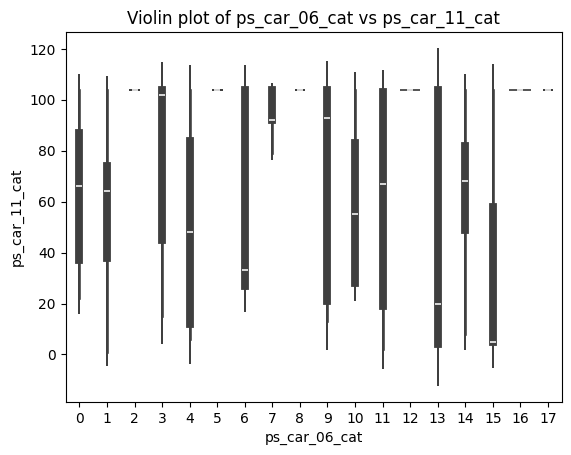

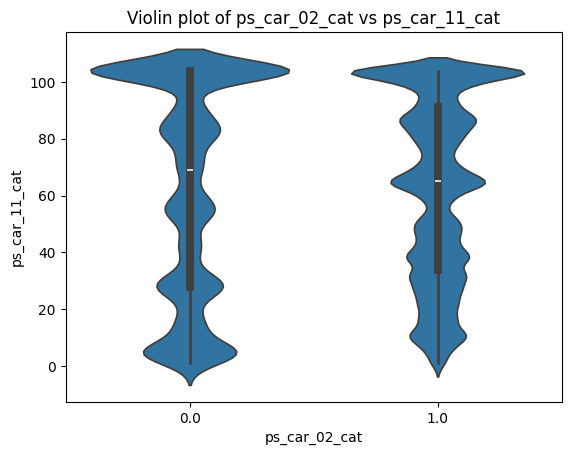

In [26]:
# trying a violin plot
sns.violinplot(data=df, x='ps_car_06_cat', y='ps_car_11_cat')
plt.title('Violin plot of ps_car_06_cat vs ps_car_11_cat')
plt.show();

sns.violinplot(data=df, x='ps_car_02_cat', y='ps_car_11_cat')
plt.title('Violin plot of ps_car_02_cat vs ps_car_11_cat')
plt.show();

### Checking for potential issues; missing values and outliers

In [27]:
# note that there are 595,212 records
# explore NA values
def sort_NA_percentage(df):
    missing_values = df.isna().sum()
    prop = (missing_values / 595212) * 100
    sorted_prop = prop.sort_values(ascending=False)
    return sorted_prop

na_prop = sort_NA_percentage(df)
print(na_prop)

# here we see that ps_car_03_cat and ps_car_05_cat have high proportions of missing values

ps_car_03_cat     69.089837
ps_car_05_cat     44.782531
ps_reg_03         18.106490
ps_car_14          7.160474
ps_car_07_cat      1.930237
ps_ind_05_cat      0.975955
ps_car_09_cat      0.095596
ps_ind_02_cat      0.036290
ps_car_01_cat      0.017977
ps_ind_04_cat      0.013945
ps_car_11          0.000840
ps_car_02_cat      0.000840
ps_car_12          0.000168
ps_calc_11         0.000000
ps_calc_15_bin     0.000000
ps_car_13          0.000000
ps_calc_19_bin     0.000000
ps_calc_18_bin     0.000000
ps_car_15          0.000000
ps_calc_01         0.000000
ps_calc_17_bin     0.000000
ps_calc_02         0.000000
ps_calc_16_bin     0.000000
ps_calc_14         0.000000
ps_calc_10         0.000000
ps_calc_13         0.000000
ps_calc_03         0.000000
ps_calc_04         0.000000
ps_calc_05         0.000000
ps_calc_06         0.000000
ps_calc_12         0.000000
ps_calc_08         0.000000
ps_calc_09         0.000000
ps_calc_07         0.000000
id                 0.000000
ps_car_11_cat      0

## Documenting Data Clean-up Decisions

In terms of next steps, the following variables have been flagged up for

- **Feature Elimination**: The deliberate exclusion of 'ps_car_03_cat' and 'ps_car_05_cat' acknowledges the excessive (>=45%) missing values that obscure true predictive potential

- **Balanced Imputation**: Proposing to move forward with median and mode imputation for numerical and categorical variables, respectively
    - This is done for the purpose of striking a balance between data retention and statistical soundness, avoiding the introduction of undue bias into our subsequent analyses

### Data Clean-Up Rationale

- **Data Quality Assurance**: These clean-up actions are essential to preserve data quality, which in turn, maintains the the reliability of downstream risk predictions and business insights

- **Analytical Precision**: Streamlining our dataset, helps to increase computational efficiency

- **Preparation for Advanced Analytics**: Having a clarified and curated dataset allows data scientisis to embark on a deeper dive into the data 
    - Steps undertaken in this book better equips data analysis to create more refined and equitable pricing strategies, powered by nuanced distinctions between high-risk and low-risk drivers


In [28]:
# Dropping columns with too many missing values
df2 = df.copy()
df2 = df2.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis=1)

# Imputing missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_07_cat', 'ps_car_09_cat']
df2[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Imputing missing values for continuous columns
cont_imputer = SimpleImputer(strategy='median')
cont_cols = ['ps_reg_03', 'ps_car_14', 'ps_car_11', 'ps_car_12']
df2[cont_cols] = cont_imputer.fit_transform(df[cont_cols])

In [29]:
print(df.shape, df2.shape)


(595212, 59) (595212, 57)
